In [6]:
# Importa las librerias necesarias para resolver los problemas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd


## Primer punto:

In [16]:
#Leamos el archivo de datos fit_curve.csv con pandas
data = pd.read_csv('fit_curve.csv')
#Definimos una variable entre 0 y 10 para graficar los ajustes
x = np.linspace(0,10,100)



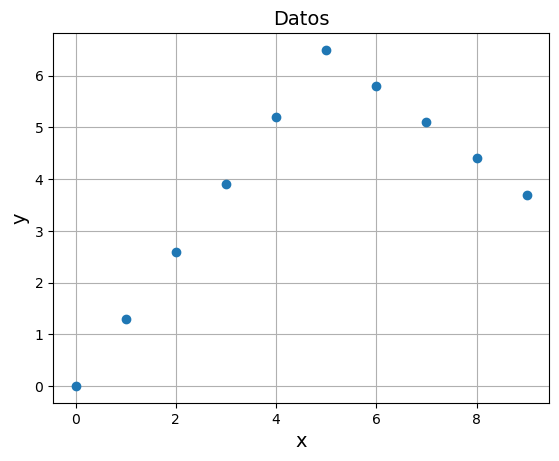

In [17]:
#Grafiquemos los datos
plt.plot(data.x,data.y,"o")
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.title("Datos",fontsize=14)
plt.grid()
plt.show()

In [18]:
#Se propone una función tipo parábola para ajustar los datos
def fun_parabola(x,a,b,c):
    return a*x**2+b*x+c

popt,pcov=curve_fit(fun_parabola,data.x,data.y)

plt.plot(data.x,data.y,'o')
plt.plot(x,fun_parabola(x,popt[0],popt[1],popt[2]))
plt.title("Ajuste por parábola",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.legend(["Datos","Ajuste"],fontsize=14)
plt.grid()
plt.show()

In [10]:
#Calculamos el error entre los datos y el ajuste
error=data.y-fun_parabola(data.x,popt[0],popt[1],popt[2])
plt.plot(data.x,abs(error),"o",color="red")
plt.title("Error",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.grid()
plt.show()




In [19]:
# Consideremos una nueva función para ajustar los datos 
def gauss(x , norm , mean , sigma ) :
    return norm* np.exp(-(x-mean)**2/(2* sigma **2))

popt,pcov=curve_fit(gauss,data.x,data.y)

plt.plot(data.x,data.y,'o')
plt.plot(x,gauss(x,popt[0],popt[1],popt[2]))
plt.title("Ajuste por gaussiana",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.legend(["Datos","Ajuste"],fontsize=14)
plt.grid()
plt.show()


In [28]:
#Veamos el error
error=data.y-gauss(data.x,popt[0],popt[1],popt[2])
plt.plot(data.x,abs(error),"o",color="red")
plt.title("Error",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.grid()
plt.show()

#Impriamos los parámetros del ajuste y su error
print("Parámetros del ajuste: ",popt)
print("Error de los parámetros: ",pcov)



Parámetros del ajuste:  [6.19486497 5.74654967 2.78281294]
Error de los parámetros:  [[ 0.07539925 -0.00492042 -0.02983811]
 [-0.00492042  0.02383241  0.00752299]
 [-0.02983811  0.00752299  0.03171018]]


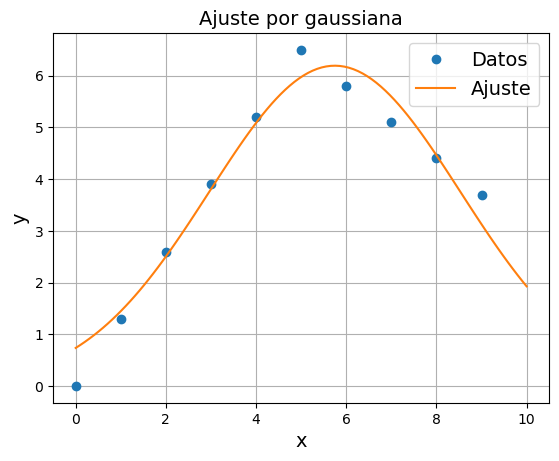

In [25]:
#AHora con chi2
def chi2(param):
    return np.sum((np.square(data.y-gauss(data.x,param[0],param[1],param[2]))))

result=minimize(chi2,[1,1,1])

plt.plot(data.x,data.y,'o')
plt.plot(x,gauss(x,result.x[0],result.x[1],result.x[2]))
plt.title("Ajuste por gaussiana",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.legend(["Datos","Ajuste"],fontsize=14)
plt.grid()
plt.show()


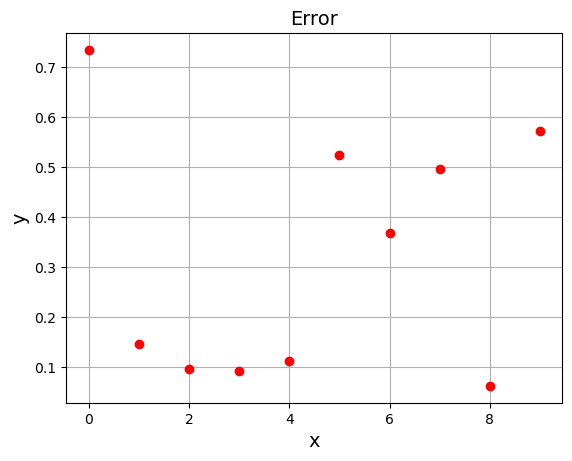

Parámetros:  [6.19486273 5.74654893 2.78281483]
Error:  1.5817602776507897


In [26]:
#Veamos el error
error=data.y-gauss(data.x,result.x[0],result.x[1],result.x[2])
plt.plot(data.x,abs(error),"o",color="red")
plt.title("Error",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.grid()
plt.show()
#Imprimimos los parámetros y el error

print("Parámetros: ",result.x)
print("Error: ",result.fun)


In [31]:
 # Ahora ajustemos los datos con una función gaussiana  f(x) = x + b + gauss(x, norm, mean, sigma)

def fun_gauss(x,b,c,norm,mean,sigma):
    return x+b+norm* np.exp(-(x-mean)**2/(2* sigma **2))

popt,pcov=curve_fit(fun_gauss,data.x,data.y)

plt.plot(data.x,data.y,'o')
plt.plot(x,fun_gauss(x,popt[0],popt[1],popt[2],popt[3],popt[4]))
plt.title("Ajuste por gaussiana generalizada",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.legend(["Datos","Ajuste"],fontsize=14)
plt.grid()
plt.show()


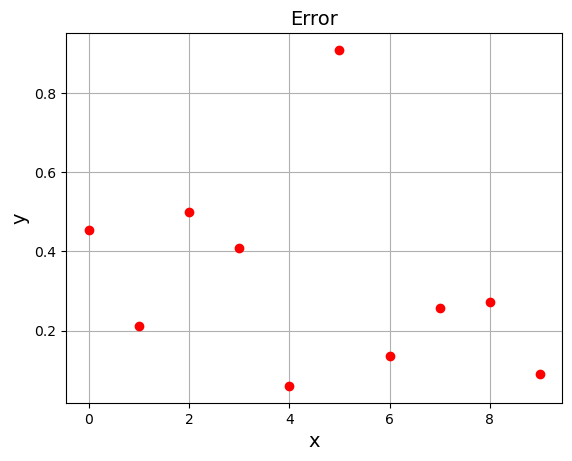

Parámetros:  [-1.04284313e+04  1.00000000e+00  1.04297411e+04  3.05201603e+00
  1.65909997e+02]


In [33]:
#Veamos el error
error=data.y-fun_gauss(data.x,popt[0],popt[1],popt[2],popt[3],popt[4])
plt.plot(data.x,abs(error),"o",color="red")
plt.title("Error",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.grid()
plt.show()

#Imprimimos los parámetros 
print("Parámetros: ",popt)


## Segundo punto

In [34]:
#Leamos y veamos los datos del archivo auto.csv
data = pd.read_csv('auto.csv')
data.head()

Unnamed: 0  symboling  normalized-losses         make aspiration  \
0           0          3                122  alfa-romero        std   
1           1          3                122  alfa-romero        std   
2           2          1                122  alfa-romero        std   
3           3          2                164         audi        std   
4           4          2                164         audi        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0        21          27  13495.0   
1                9.0       111.0    5000.0        21          27  16500.0   
2                9.0       154.0    5000.0        19          26  16500.0   
3               10.0       102.0    5500.0        24          30  13950.0   
4                8.0       115.0    5500.0        18          22  17450.0   

   city-L/100km horsepower-binned  diesel  gas  
0     11.190476            Medium       0    1  
1     11.190476            Medium       0    1  
2     12.368421            Medium       0    1  
3      9.791667            Medium       0    1  
4     13.055556            Medium       0    1  

[5 rows x 30 columns]

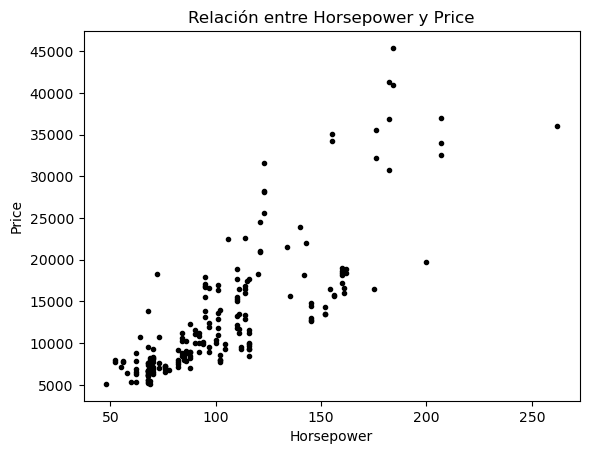

In [42]:

# Gráfico 1: Scatter plot entre dos variables
plt.scatter(data['horsepower'], data['price'],  color='black', marker='.')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Relación entre Horsepower y Price')
plt.show()




En base al gráfico, parece haber una relación positiva entre la potencia (horsepower) y el precio (price) de los automóviles. A medida que la potencia aumenta, también lo hace el precio.

In [40]:
# Gráfico 2: Histograma de una variable
plt.hist(data['city-mpg'], bins=10, color='red', edgecolor='white', linewidth=1.2)
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.title('Distribución de City MPG')
plt.show()

El histograma muestra la distribución de los valores de City MPG. La mayoría de los automóviles tienen un City MPG alrededor de 30, lo que indica que son más eficientes en términos de consumo de combustible en entornos urbanos.

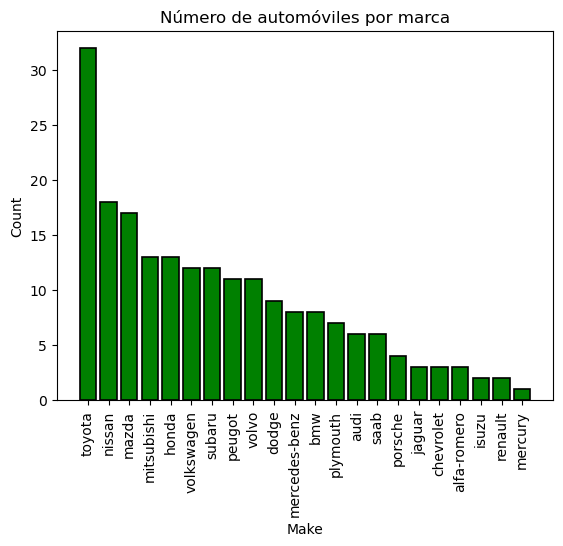

In [39]:
# Gráfico 3: Gráfico de barras de una variable categórica
make_counts = data['make'].value_counts()
plt.bar(make_counts.index, make_counts.values, color='green', edgecolor='black', linewidth=1.2)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Número de automóviles por marca')
plt.xticks(rotation=90)
plt.show()


El gráfico de barras muestra el número de automóviles por marca. La marca Toyota tiene la mayor cantidad de automóviles en el conjunto de datos, seguida de Nissan y Mazda.

## Veamos el pequeño informe entre un par de relaciones:

En respuesta a la solicitud del gerente de ventas de automóviles, se ha llevado a cabo un análisis de la base de datos de automóviles para identificar dos relaciones importantes entre diferentes variables. Estas relaciones proporcionarán información relevante para comprender mejor el mercado automotriz y tomar decisiones estratégicas.

### Relación: Precio - Caballos de Potencia:
La relación entre el precio de un automóvil y su potencia (medida en caballos de potencia) es de gran importancia en la industria automotriz, por ejemplo en los siguientes ítems:
Valor percibido del automóvil: La potencia del motor es un factor determinante en el rendimiento y la capacidad de aceleración de un automóvil. Los clientes suelen asociar un mayor precio con vehículos más potentes, lo que refleja un mejor rendimiento en términos de velocidad y maniobrabilidad. Esta relación es fundamental para los compradores que buscan vehículos de alto rendimiento y están dispuestos a invertir más para obtenerlos.

Competitividad y posicionamiento en el mercado: El análisis de la relación entre precio y potencia puede ayudar a las marcas de automóviles a comprender su posición en el mercado en comparación con sus competidores. Si una marca ofrece vehículos con altos niveles de potencia a precios más bajos que sus competidores, puede ganar una ventaja competitiva y atraer a un segmento de mercado específico. Por otro lado, una marca que ofrece vehículos de baja potencia a precios altos puede necesitar ajustar su estrategia para mejorar su competitividad.


### Relación: Marca - Combustible:
La relación entre la marca de un automóvil y el tipo de combustible que utiliza también es una relación relevante y digna de análisis. Veamos un par de hechos relacionados:
Identidad de marca: El tipo de combustible utilizado por los vehículos de una marca puede reflejar su identidad y valores. Algunas marcas se asocian con tecnologías de combustibles alternativos, como vehículos eléctricos o híbridos, que transmiten una imagen de sostenibilidad y conciencia ambiental. Esta relación puede ser importante para los clientes que buscan automóviles que se alineen con sus valores y preocupaciones ambientales.

Costos operativos y preferencias de los consumidores: La relación entre la marca y el combustible utilizado también puede afectar los costos operativos y las preferencias de los consumidores. Por ejemplo, los vehículos que utilizan combustibles alternativos pueden tener costos de combustible más bajos o ser elegibles para incentivos fiscales o beneficios